# Multiclass Classification

- Recognize handwritten digits: regularized logistic regression, one-vs-all
- Data: 20 pixel by 20 pixel grayscale images
- Label: 1-10("0" digit is labeled as "10")



1. [Load Data](#data)
2. [Visualize Data](#plot)
3. [Helper Functions](#helper)
4. [Regularized Logistic Regression Cost Function](#cost)
5. [One-vs-All Logistic Regression](#ova)
6. [Make Predictions](#predict)

## Load Data <a name="data"></a>

In [1]:
%pylab inline
from scipy.io import loadmat
import pylab

Populating the interactive namespace from numpy and matplotlib


In [2]:
dat = loadmat('dataset/ex3data1.mat')
X = dat['X']; y = dat['y']
y[y == 10] = 0
p = X.shape[1]
N = len(y)
print("Number of examples: {}".format(N))
print("Number of features: {}".format(p))

Number of examples: 5000
Number of features: 400


## Visualize Data <a name="plot"></a>

- Randomly select 100 examples to display

In [3]:
from numpy.random import choice
randSample = X[choice(N, size = 100)]

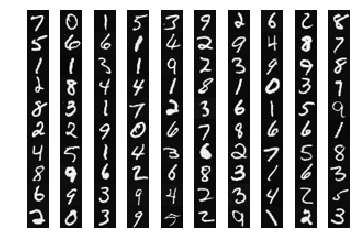

In [4]:
for i in range(100):
    plt.subplot(10, 10, i + 1)
    a = reshape(randSample[i], (20, 20)).T
    plt.imshow(a, cmap = plt.get_cmap('gray'))
    plt.axis('off')
plt.subplots_adjust(wspace = 0, hspace = 0)
plt.show()

## Helper Functions <a name="helper"></a>
- Add intercept

In [5]:
def addintercept(X):
    N = X.shape[0]
    X = np.hstack((np.ones((N, 1)), X))
    return X

- Sigmoid function

In [6]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

## Regularized Logistic Regression Cost Function <a name="cost"></a>

- Hypothesis:
$$
h_{\theta}(x)=\sigma(\theta^Tx)=\frac{1}{1+e^{-\theta^Tx}}
$$

- Cost Function
$$
J(\theta)=\frac{1}{N}\sum_{i=1}^N\left[ -y^{(i)}\log h_{\theta}(x^{(i)})-(1-y^{(i)})\log (1-h_{\theta}(x^{(i)}))\right]
+\frac{\lambda}{2N}\sum_{j=1}^p \theta_j^2
$$

- Gradient:
$$
\frac{\partial}{\partial\theta_j}J(\theta)=
\begin{cases}
\frac{1}{N}\sum_{i=1}^N (h_{\theta}(x^{(i)})-y^{(i)})x^{(i)}_j +\frac{\lambda}{N}\theta_j,&j=1,2,\ldots,p\newline
\frac{1}{N}\sum_{i=1}^N (h_{\theta}(x^{(i)})-y^{(i)}),&j=0
\end{cases}
$$

In [7]:
def costAndGradient(X, y, theta, lam):
    N = len(y)
    temp = np.copy(theta)
    temp[0] = 0
    
    # compute cost
    a = sigmoid(np.dot(X, theta))
    cost = - np.mean(y * np.log(a) + (1 - y) * np.log(1 - a))
    cost += lam * np.dot(temp.T, temp)/(2 * N)
     
    # compute gradient
    grad = (np.dot(X.T, a - y) + lam * temp)/N

    d = {"cost":cost,
         "grad":grad}
    return d

## One-vs-All Logistic Regression <a name="ova"></a>

In [8]:
def optimize(X, y, theta, lam, learning_rate, iterations):
    J = []
    for i in range(iterations):
        d = costAndGradient(X, y, theta, lam)
        theta -= learning_rate * d["grad"]
        J.append(d["cost"])
    return theta, J

In [9]:
def oneVsAll(X, y, numLabels = 10, lam = 0.1, learning_rate = 3, iterations = 1000):
    # add intercept
    Xint = addintercept(X)
    
    # initialize params
    all_theta = np.zeros((numLabels, Xint.shape[1]))
    for label in range(numLabels):
        theta = np.zeros((Xint.shape[1], 1))
        theta, cost_hist = optimize(Xint, y == label, theta, lam, learning_rate, iterations)
        all_theta[label] = theta.T
    return all_theta

In [10]:
all_theta = oneVsAll(X, y)

## Make Predictions <a name="predict"></a>

In [11]:
def predictOneVsAll(X, all_theta):
    Xint = addintercept(X)
    return np.argmax(sigmoid(np.dot(Xint, all_theta.T)), axis = 1)

In [12]:
pred = predictOneVsAll(X, all_theta)
np.mean(pred == np.squeeze(y))

0.9422